In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

# Variables

In [2]:
# Demand Size
demand_size_list = [i for i in range(100, 600, 50)]
# Demand Split Ratio (Inter-Intra Modal, %)
demand_split_ratio_list = [i for i in range(10, 91, 20)]

# Random Seed
random_seed_list = [3, 6, 9]

# Fixed Values

In [3]:
# Total Simulation Time (s)
total_simulation_time = 4 * 3600
# Simulation Time Step (s)
simulation_time_step = 30
# Warmup Time (s)
warmup_time = 1 * 3600

# Minimum Intra-Trip Distance (m)
min_intra_trip_distance = 3000

# Simulation Time

In [4]:
# Simulation Time Points
simulation_time_points = list(range(warmup_time, total_simulation_time+warmup_time+1, simulation_time_step))

# Network

In [5]:
# Load Network Files
network_name = "11-500"
network_path = f"data/network/{network_name}/"
node_df = pd.read_csv(network_path + "nodes.csv")
link_df = pd.read_csv(network_path + "edges.csv")

node_id_list = node_df['node_index'].tolist()
print(f"Number of nodes: {len(node_id_list)}")

left_node_id_list = [i for i in range(0, len(node_id_list)//2)]
right_node_id_list = [i for i in range(len(node_id_list)//2, len(node_id_list))]
print(f"Number of left nodes: {len(left_node_id_list)}")
print(f"Number of right nodes: {len(right_node_id_list)}")

Number of nodes: 242
Number of left nodes: 121
Number of right nodes: 121


Distance matrix shape: (242, 242)


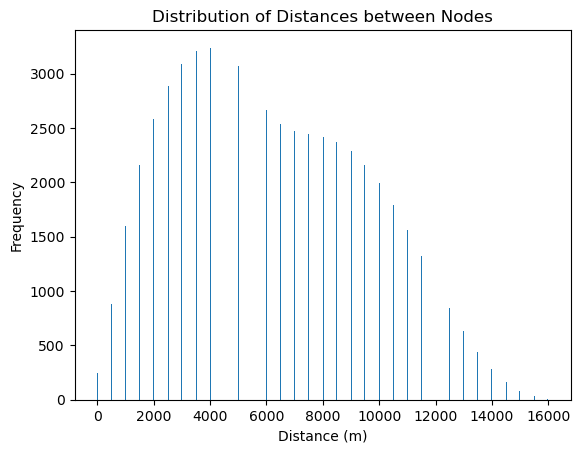

In [6]:
# Load Distance Matrix
distance_matrix = np.load(network_path + "dist_matrix.npy")
print(f"Distance matrix shape: {distance_matrix.shape}")

# Draw the Distribution of Distances
plt.hist(distance_matrix.flatten(), bins=500)
plt.xlabel("Distance (m)")
plt.ylabel("Frequency")
plt.title("Distribution of Distances between Nodes")
plt.show()

# Create OD demand

In [7]:
def create_demand(demand_size, demand_split_ratio, random_seed):
    np.random.seed(random_seed)
    
    # Number of left and right demands
    Half_demand_size = demand_size / 2

    num_half_intra_demand = int((Half_demand_size) * (demand_split_ratio / 100))
    num_half_inter_demand = Half_demand_size - num_half_intra_demand
    print(f"Number of half intra demands: {num_half_intra_demand}")
    print(f"Number of half inter demands: {num_half_inter_demand}")

    # Generate left demands
    left_demand_list = []
    # Generate left intra demands
    left_intra_count = 0
    while left_intra_count < num_half_intra_demand:
        origin = np.random.choice(left_node_id_list)
        destination = np.random.choice(left_node_id_list)
        if origin != destination and distance_matrix[origin][destination] >= min_intra_trip_distance:
            request_time = np.random.choice(simulation_time_points)
            left_demand_list.append((origin, destination, request_time))
            left_intra_count += 1
    # Generate left inter demands
    left_inter_count = 0
    while left_inter_count < num_half_inter_demand:
        origin = np.random.choice(left_node_id_list)
        destination = np.random.choice(right_node_id_list)
        request_time = np.random.choice(simulation_time_points)
        left_demand_list.append((origin, destination, request_time))
        left_inter_count += 1
    print(f"Total left demands generated: {len(left_demand_list)}")

    # Generate right demands
    right_demand_list = []
    # Generate right intra demands
    right_intra_count = 0
    while right_intra_count < num_half_intra_demand:
        origin = np.random.choice(right_node_id_list)
        destination = np.random.choice(right_node_id_list)
        if origin != destination and distance_matrix[origin][destination] >= min_intra_trip_distance:
            request_time = np.random.choice(simulation_time_points)
            right_demand_list.append((origin, destination, request_time))
            right_intra_count += 1
    # Generate right inter demands
    right_inter_count = 0
    while right_inter_count < num_half_inter_demand:
        origin = np.random.choice(right_node_id_list)
        destination = np.random.choice(left_node_id_list)
        request_time = np.random.choice(simulation_time_points)
        right_demand_list.append((origin, destination, request_time))
        right_inter_count += 1
    print(f"Total right demands generated: {len(right_demand_list)}")

    # Combine left and right demands
    total_demand_list = left_demand_list + right_demand_list
    print(f"Total demands generated: {len(total_demand_list)}")

    return total_demand_list

Number of half intra demands: 75
Number of half inter demands: 75.0
Total left demands generated: 150
Total right demands generated: 150
Total demands generated: 300
[(106, 24, 11070), (3, 56, 17280), (0, 21, 8010), (21, 119, 16260), (96, 20, 16440), (93, 39, 15540), (22, 66, 11340), (63, 60, 7470), (29, 106, 8160), (62, 7, 8730)]
